<a href="https://colab.research.google.com/github/MekhzZ/LearningPath/blob/main/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining**

# **Finding the optimal number of clusters in K means clustering**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/best_sellers.csv')

In [4]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
x = df.iloc[:, [2,4]].values

In [6]:
x

array([[ 4.7,  8. ],
       [ 4.6, 22. ],
       [ 4.7, 15. ],
       ...,
       [ 4.7,  8. ],
       [ 4.7,  8. ],
       [ 4.7,  8. ]])

In [7]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [8]:
df[['User Rating', 'Price']].values

array([[ 4.7,  8. ],
       [ 4.6, 22. ],
       [ 4.7, 15. ],
       ...,
       [ 4.7,  8. ],
       [ 4.7,  8. ],
       [ 4.7,  8. ]])

# **Using Elbow Method to find optimal clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

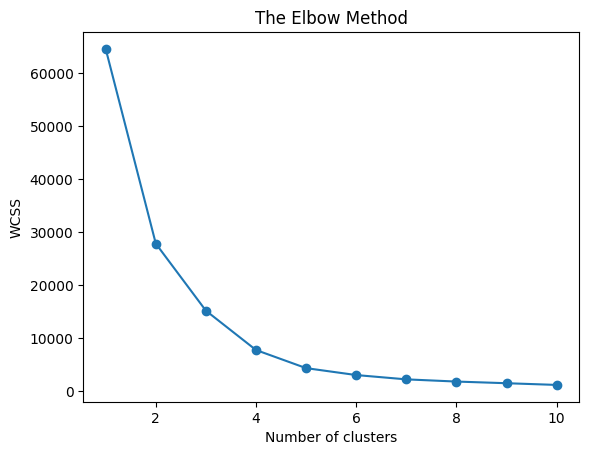

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

from above diagram we can see that from 5, the garph is bending slightly , so we can conclude that the optimal number of clusters is 5

# **Training Kmeans Model**

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
y_kmeans

array([3, 4, 0, 3, 0, 0, 4, 0, 3, 3, 3, 3, 4, 3, 0, 3, 3, 3, 3, 0, 0, 0,
       0, 3, 0, 3, 3, 0, 3, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 1, 1, 3, 0, 4, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       4, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       4, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 2, 0, 4,
       0, 0, 4, 4, 3, 2, 3, 3, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 4, 0, 4, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 4, 3, 0, 0, 3, 3,
       0, 3, 0, 3, 3, 0, 4, 0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3,
       3, 0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 4, 4, 3, 3,
       3, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 3, 3,
       0, 0, 0, 0, 4, 4, 3, 3, 3, 3, 0, 0, 3, 4, 0,

Cluster centers with x and y coordinates

In [12]:
kmeans.cluster_centers_

array([[ 4.56      , 13.92820513],
       [ 4.56666667, 97.33333333],
       [ 4.53333333, 44.57142857],
       [ 4.67180451,  6.57518797],
       [ 4.60461538, 23.26153846]])

Visualizing Clusters

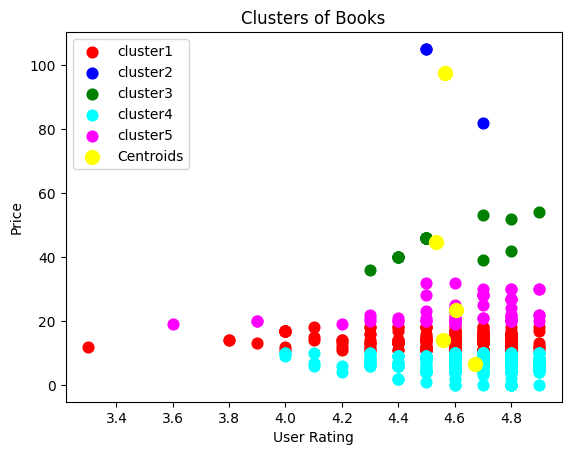

In [13]:
color_list = ['red', 'blue', 'green', 'cyan', 'magenta']
cluster_label = ['cluster1','cluster2','cluster3','cluster4','cluster5']
for i in range(5):
  plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s = 60, c = color_list[i], label = cluster_label[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Books')
plt.xlabel('User Rating')
plt.ylabel('Price')
plt.legend()
plt.show()

Hierarchical Clustering in notes


# **DBSCAN (Density Based Spatial Clustering of Applications using Noise)**

DBSCAN is able to find the clusters with noise which helps us to find the right pattern

**Two key parameters**


1.   eps , distance between neighbours
2.   minPts , Minimum number of datapoints to define cluster


**Based on above parameters, points are classified into**



1.   Core - center of the cluster
2.   Border - atleast one core at the center
3. Noise - outlier





**Let's Implement it**

In [14]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [15]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [16]:
x = df.iloc[:, [3,4]].values

In [17]:
x

array([[17350,     8],
       [ 2052,    22],
       [18979,    15],
       ...,
       [14331,     8],
       [14331,     8],
       [14331,     8]])

Implementing DBSCAN using sklearn with distance metric euclidean of 3 and min sample is 4. It's all hit and try method

In [18]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=4, metric = 'euclidean')
y_dbscan = dbscan.fit_predict(x)
y_dbscan

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  2,  2,  2,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  3,  3,  3,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4,  4,  4,  4,
        4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        5,  5,  5,  5,  5,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  6,  6,  6,  6,  6, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

The 0 value represents there is a outlier

In [19]:
df['Cluster'] = y_dbscan

In [20]:
df['Cluster'].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24])

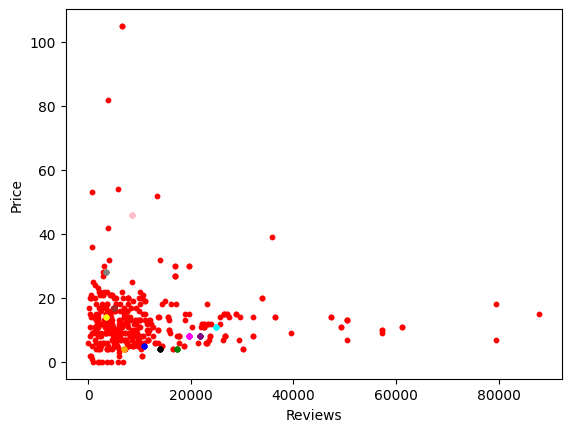

In [21]:
plt.scatter(x[y_dbscan == -1,0], x[y_dbscan == -1,1],s = 10, c = 'red')
plt.scatter(x[y_dbscan == 0,0], x[y_dbscan == 0,1],s = 10, c = 'blue')
plt.scatter(x[y_dbscan == 1,0], x[y_dbscan == 1,1],s = 10, c = 'green')
plt.scatter(x[y_dbscan == 2,0], x[y_dbscan == 2,1],s = 10, c = 'black')
plt.scatter(x[y_dbscan == 3,0], x[y_dbscan == 3,1],s = 10, c = 'yellow')
plt.scatter(x[y_dbscan == 4,0], x[y_dbscan == 4,1],s = 10, c = 'cyan')
plt.scatter(x[y_dbscan == 5,0], x[y_dbscan == 5,1],s = 10, c = 'magenta')
plt.scatter(x[y_dbscan == 6,0], x[y_dbscan == 6,1],s = 10, c = 'orange')
plt.scatter(x[y_dbscan == 7,0], x[y_dbscan == 7,1],s = 10, c = 'purple')
plt.scatter(x[y_dbscan == 8,0], x[y_dbscan == 8,1],s = 10, c = 'pink')
plt.scatter(x[y_dbscan == 9,0], x[y_dbscan == 9,1],s = 10, c = 'brown')
plt.scatter(x[y_dbscan == 10,0], x[y_dbscan == 10,1],s = 10, c = 'gray')
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.show()



# **Implementing Decision Tree**

In [22]:
import seaborn as sns

In [23]:
dtree = pd.read_csv('/content/movie_outing.csv')

In [24]:
dtree

,Day,Outlook,Humidity,Temperature,Out For Movie
0,D1,Sunny,High,Hot,No
1,D2,Sunny,High,Hot,No
2,D3,Overcast,High,Hot,Yes
3,D4,Rain,High,Mild,Yes
4,D5,Rain,Normal,Cool,Yes
5,D6,Rain,Normal,Cool,Yes
6,D7,Overcast,Normal,Cool,Yes
7,D8,Sunny,High,Mild,No
8,D9,Sunny,Normal,Cool,Yes
9,D10,Rain,Normal,Mild,Yes


if there is null value or not


In [25]:
dtree.isnull().sum()

Day              0
Outlook          0
Humidity         0
Temperature      0
Out For Movie    0
dtype: int64

calling labeling function from sklearn

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encode string value into numeric for better preprocess of data

In [27]:
dtree.columns

Index(['Day', 'Outlook', 'Humidity', 'Temperature', 'Out For Movie'], dtype='object')

In [28]:
dtree['Day'] = le.fit_transform(dtree['Day'])
dtree['Humidity'] = le.fit_transform(dtree['Humidity'])
dtree['Outlook'] = le.fit_transform(dtree['Outlook'])
dtree['Temperature'] = le.fit_transform(dtree['Temperature'])
dtree['Out For Movie'] = le.fit_transform(dtree['Out For Movie'])

In [29]:
dtree

,Day,Outlook,Humidity,Temperature,Out For Movie
0,0,2,0,1,0
1,6,2,0,1,0
2,7,0,0,1,1
3,8,1,0,2,1
4,9,1,1,0,1
5,10,1,1,0,1
6,11,0,1,0,1
7,12,2,0,2,0
8,13,2,1,0,1
9,1,1,1,2,1


now dividing or splitting test and train columns

In [30]:
x = dtree.drop('Out For Movie', axis=1)
y = dtree['Out For Movie']

splitting train and test

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

importing classifier and trained it using gini

In [32]:
from sklearn.tree import DecisionTreeClassifier
gini_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state= 0)
gini_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [33]:
pred = gini_model.predict(x_test)

In [34]:
pred

array([1, 1, 0])

In [35]:
from sklearn.metrics import accuracy_score
print('mdoel accuracy : {0:0.4f}'.format(accuracy_score(y_test,pred)))

mdoel accuracy : 1.0000


[Text(0.4, 0.8333333333333334, 'x[1] <= 1.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6, 0.5, 'x[2] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

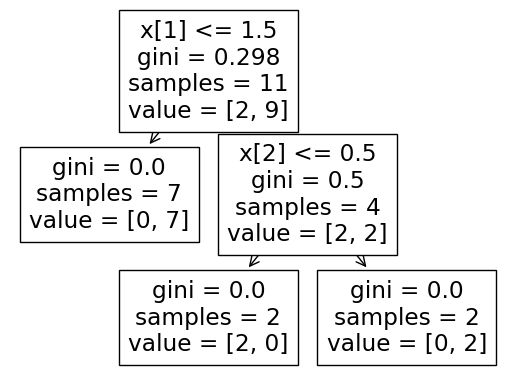

In [36]:
from sklearn import tree
tree.plot_tree(gini_model)

# **Bagging and Boosting**

Bagging

where multiple models are tested based on use case


In [37]:
movie = pd.read_csv('/content/movie_outing.csv')

In [38]:
movie

,Day,Outlook,Humidity,Temperature,Out For Movie
0,D1,Sunny,High,Hot,No
1,D2,Sunny,High,Hot,No
2,D3,Overcast,High,Hot,Yes
3,D4,Rain,High,Mild,Yes
4,D5,Rain,Normal,Cool,Yes
5,D6,Rain,Normal,Cool,Yes
6,D7,Overcast,Normal,Cool,Yes
7,D8,Sunny,High,Mild,No
8,D9,Sunny,Normal,Cool,Yes
9,D10,Rain,Normal,Mild,Yes


In [39]:
movie.isnull().sum()

Day              0
Outlook          0
Humidity         0
Temperature      0
Out For Movie    0
dtype: int64

In [40]:
movie['Day'] = le.fit_transform(movie['Day'])
movie['Humidity'] = le.fit_transform(movie['Humidity'])
movie['Outlook'] = le.fit_transform(movie['Outlook'])
movie['Temperature'] = le.fit_transform(movie['Temperature'])

In [41]:
movie

,Day,Outlook,Humidity,Temperature,Out For Movie
0,0,2,0,1,No
1,6,2,0,1,No
2,7,0,0,1,Yes
3,8,1,0,2,Yes
4,9,1,1,0,Yes
5,10,1,1,0,Yes
6,11,0,1,0,Yes
7,12,2,0,2,No
8,13,2,1,0,Yes
9,1,1,1,2,Yes


In [42]:
a = movie.drop('Out For Movie', axis=1)
b = movie['Out For Movie']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.33, random_state=42)

size = 0.33 means 33% of data is meant to be for tested

and

random state is for shuffling data correctly

**Applying Bagging**

In [44]:
from sklearn.ensemble import BaggingClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier


In [46]:
seed = 7 #bagging parameter
cart = DecisionTreeClassifier()
num_trees = 100 #how many trees do we want
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=7)

In [47]:
prediction = model.predict(X_test)

In [48]:
prediction

array(['Yes', 'Yes', 'No', 'Yes', 'Yes'], dtype=object)

In [49]:
accuracy_score(y_test, prediction)

1.0

**Boosting**

it is done to reduce the loss


In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=num_trees, max_features=3)

model.fit(X_train, y_train)

pred = model.predict(X_test)

accuracy_score(y_test, pred)

1.0

# **Outlier and It's effect and to handle it**

In [51]:
from sklearn.datasets import load_iris

In [52]:
iris = load_iris()

In [53]:
x = iris.data
y = iris.target
columns = iris.feature_names

In [54]:
i = pd.DataFrame(x, columns=columns)
i.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Using boxplot from seaborn to visualize whether there is an outlier or not**

<Axes: ylabel='petal length (cm)'>

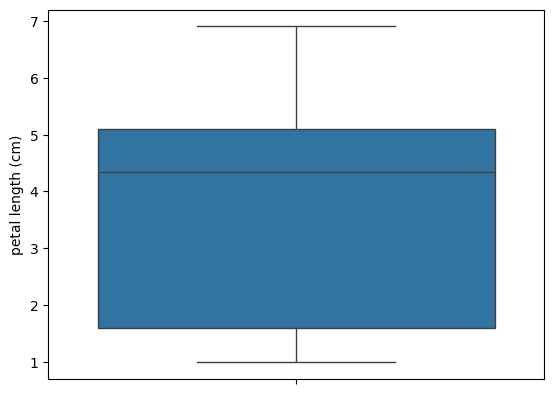

In [55]:
sns.boxplot(i['petal length (cm)'])

<Axes: ylabel='petal width (cm)'>

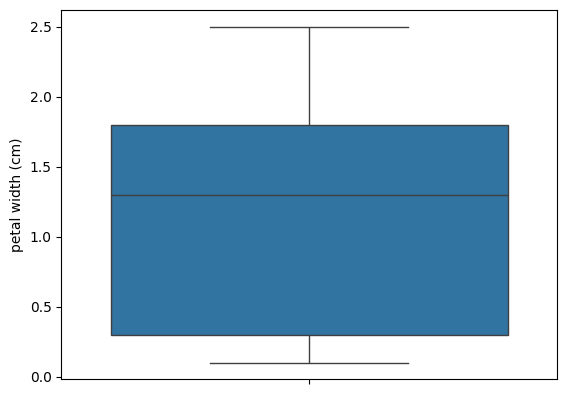

In [56]:
sns.boxplot(i['petal width (cm)'])

<Axes: ylabel='sepal length (cm)'>

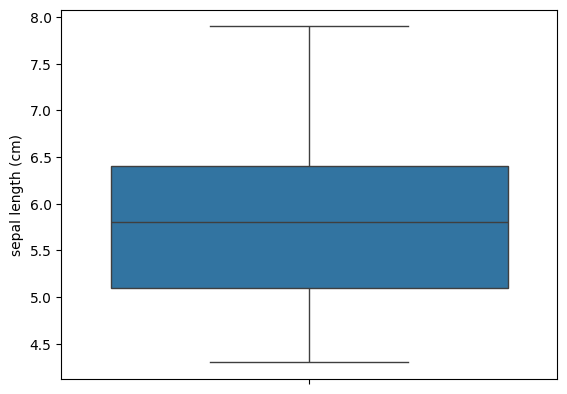

In [57]:
sns.boxplot(i['sepal length (cm)'])

<Axes: ylabel='sepal width (cm)'>

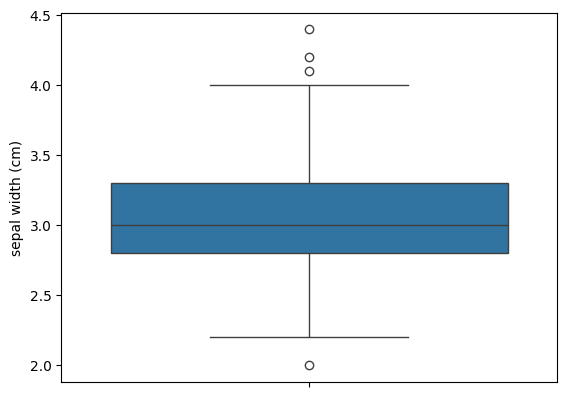

In [58]:
sns.boxplot(i['sepal width (cm)'])

In this above figure, we can see the outliers present in a column

**Boxplot is one of the technique to identify outliers if it is present in a data column or not**

**Now let's handle outlier as we learnt about DBSCAN but let's study more techniques like**


***Statistical and Proximity Methods***

In [59]:
from scipy.stats import kurtosis

#Kurtosis is a measure of the tailedness of a distribution, which shows how often outliers occur.

In [60]:
i.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:
i.shape

(150, 4)

In [62]:
kurtosis(i)

array([-0.57356795,  0.18097632, -1.39553589, -1.33606741])

In [63]:
#z score

from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(i))
print(z)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             0.900681          1.019004           1.340227          1.315444
1             1.143017          0.131979           1.340227          1.315444
2             1.385353          0.328414           1.397064          1.315444
3             1.506521          0.098217           1.283389          1.315444
4             1.021849          1.249201           1.340227          1.315444
..                 ...               ...                ...               ...
145           1.038005          0.131979           0.819596          1.448832
146           0.553333          1.282963           0.705921          0.922303
147           0.795669          0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662          0.131979           0.762758          0.790671

[150 rows x 4 columns]


Normally z value greater than 3 is considered as outlier

In [64]:
threshold = 3
print(np.where(z > 3))

(array([15]), array([1]))


indexing 15,1 which means

sepal width at 15 got z value more than 3

In [65]:
z['sepal width (cm)'][15]

3.0907752482994253

# **Encoding**

generally two types of features in a dataset

*   Categorical (Nominal, Ordinal)
*   Numerical (Integer, floataaaaa)



Ordinal = yes, no

Nominal = not in order like (cat, dog, wolf)

these categorical value need to be transformed into numerical values

In [66]:
df = pd.DataFrame({
    'country' : ['Nepal','India','Pakistan','Australia'],
    'age' : [25,30,40,50],
    'salary' : [50000,60000,70000,80000],
    'purchased' : ['No','Yes','Yes','No']

})

In [67]:
df

,country,age,salary,purchased
0,Nepal,25,50000,No
1,India,30,60000,Yes
2,Pakistan,40,70000,Yes
3,Australia,50,80000,No


In [68]:
df.dtypes

country      object
age           int64
salary        int64
purchased    object
dtype: object

we have two categorical feature



*   country
*   purchased



# **Label Encoding**

In [69]:
df['country'].unique()

array(['Nepal', 'India', 'Pakistan', 'Australia'], dtype=object)

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [71]:
df.drop([3], inplace= True)

In [72]:
df['country'] = le.fit_transform(df['country'])

In [73]:
df['country']

0    1
1    0
2    2
Name: country, dtype: int64

**Nominal Encoding**

we did nominal encoding because

label encoding encodes the data in ranking order or in ordinal number

In [74]:
pd.get_dummies(df['country'])

,0,1,2
0,False,True,False
1,True,False,False
2,False,False,True


we can reduce one column as if other two are false then column 1 is automatically true

In [75]:
pd.get_dummies(df['country']).drop([0], axis=1)

,1,2
0,True,False
1,False,False
2,False,True


Here we have one hot encoding . but according to the need of dataset we have to figure out which encoding should be used

# **Frequency Encoding**

In [76]:
bs = pd.read_csv('/content/best_sellers.csv')

In [77]:
bs.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [78]:
bs.shape

(550, 7)

In [79]:
bs.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [80]:
l = []
for i in bs.columns:
  if bs[i].dtypes == 'object':
    l.append(i)
# we created a list of column names of data type object


In [81]:
l

['Name', 'Author', 'Genre']

In [82]:
obj = bs[l]

In [83]:
obj

,Name,Author,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,Non Fiction
1,11/22/63: A Novel,Stephen King,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,Non Fiction
3,1984 (Signet Classics),George Orwell,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,Non Fiction
...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,Non Fiction


In [84]:
obj['Author'].value_counts()

Author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: count, Length: 248, dtype: int64

In [85]:
obj['Author'].nunique()

248

In [86]:
obj.head()

,Name,Author,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,Non Fiction
1,11/22/63: A Novel,Stephen King,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,Non Fiction
3,1984 (Signet Classics),George Orwell,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,Non Fiction


In [87]:
len(obj)

550

In [88]:
freq = obj['Author'].value_counts()/len(obj)

In [89]:
freq

Author
Jeff Kinney                           0.021818
Gary Chapman                          0.020000
Rick Riordan                          0.020000
Suzanne Collins                       0.020000
American Psychological Association    0.018182
                                        ...   
Keith Richards                        0.001818
Chris Cleave                          0.001818
Alice Schertle                        0.001818
Celeste Ng                            0.001818
Adam Gasiewski                        0.001818
Name: count, Length: 248, dtype: float64

In [90]:
obj['Author'].map(freq)

0      0.001818
1      0.007273
2      0.001818
3      0.001818
4      0.001818
         ...   
545    0.021818
546    0.007273
547    0.007273
548    0.007273
549    0.007273
Name: Author, Length: 550, dtype: float64

Frequency encoding helps in the following ways: It simplifies categorical data: By changing categories into numbers, data becomes easier to handle and process. It captures valuable information: The frequency of each category can be valuable information that a model can learn from.


# **Target Mean encoding**

In [91]:
data = sns.load_dataset('planets')

In [92]:
data.shape

(1035, 6)

In [93]:
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [94]:
data['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [95]:
data['method'].value_counts()

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

suppose I made 'orbital_period' as my target variable .

and what we do is simply grouping method with our target variable to get mean of data

In [96]:
dict = data.groupby('method')['orbital_period'].mean().to_dict()

In [97]:
dict

{'Astrometry': 631.1800000000001,
 'Eclipse Timing Variations': 4751.644444444445,
 'Imaging': 118247.7375,
 'Microlensing': 3153.5714285714284,
 'Orbital Brightness Modulation': 0.7093065833333334,
 'Pulsar Timing': 7343.021201258,
 'Pulsation Timing Variations': 1170.0,
 'Radial Velocity': 823.3546800171247,
 'Transit': 21.102072671259446,
 'Transit Timing Variations': 79.7835}

In [98]:
t_encode = []
for i in data['method']:
  if i in dict.keys():
    t_encode.append(dict[i])

In [99]:
t_encode

[823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 118247.7375,
 118247.7375,
 118247.7375,
 4751.644444444445,
 118247.7375,
 118247.7375,
 118247.7375,
 118247.7375,
 4751.644444444445,
 4751.644444444445,
 4751.644444444445,
 4751.644444444445,
 4751.644444444445,
 4751.644444444445,
 4751.644444444445,
 4751.644444444445,
 823.3546800171247,
 823.3546800171247,
 118247.7375,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.3546800171247,
 823.354

In [100]:
data['method'] = t_encode

In [101]:
data.head()

,method,number,orbital_period,mass,distance,year
0,823.35468,1,269.300,7.10,77.40,2006
1,823.35468,1,874.774,2.21,56.95,2008
2,823.35468,1,763.000,2.60,19.84,2011
3,823.35468,1,326.030,19.40,110.62,2007
4,823.35468,1,516.220,10.50,119.47,2009


Target encoding involves replacing a categorical feature with the average target value of all data points belonging to the category.

This allows us to encode an arbitrary number of categories without increasing the dimensionality of our data2.

# **Filling Missing Values**

In [102]:
train = pd.read_csv('/content/train.csv')

In [103]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [104]:
train.shape

(614, 13)

In [105]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Filling with Mean and Median

let's take one column like LoanAmount

In [106]:
train['LoanAmount'].isnull().sum()

22

In [107]:
train['LoanAmount'].head()

0      NaN
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64

In [108]:
with_mean = train['LoanAmount'].fillna(train['LoanAmount'].mean())

In [109]:
with_mean

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

In [110]:
with_median = train['LoanAmount'].fillna(train['LoanAmount'].median())


In [111]:
with_median

0      128.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

for categoircal values

In [112]:
train['Married'].isnull().sum()

3

In [113]:
train[train['Married'].isnull()].index

Index([104, 228, 435], dtype='int64')

In [114]:
fill_with_unknown = train['Married'].fillna('unknown')

In [115]:
fill_with_unknown.iloc[[104,228,435]]

104    unknown
228    unknown
435    unknown
Name: Married, dtype: object

# **Exploring Groceries data**

In [116]:
df = pd.read_csv('/content/Groceries_dataset.csv')

In [117]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [118]:
df['itemDescription'].value_counts()

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

well we can see 167 item, we cannot analyse that much data properly so let's start with top 10 items

<Axes: xlabel='itemDescription', ylabel='count'>

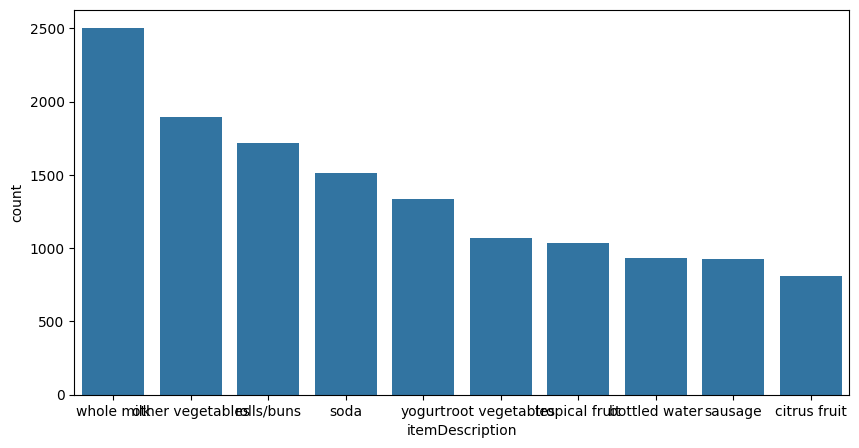

In [119]:
plt.figure(figsize=(10,5))
item_name = df.itemDescription.value_counts().head(10).index
item_count = df.itemDescription.value_counts().head(10)
sns.barplot(x=item_name, y=item_count)

from above figure we can conclude that whole milk is bought so much

In [120]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [121]:
df.shape

(38765, 3)

In [122]:
df['Member_number'].value_counts()

Member_number
3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: count, Length: 3898, dtype: int64

there's somany regular customers so lets focus on it rather than one time buyer

let's make one dataframe which consist all multiple tranasactions

In [123]:
t_df = [transaction[1]['itemDescription'].tolist() for transaction in df.groupby(['Member_number','Date'])]

In [124]:
t_df

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

now a perfect dataframe as our requirements

let's encode it and do the rest

In [125]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(t_df).transform(t_df)
matrix = pd.DataFrame(te_ary, columns=te.columns_)

In [126]:
matrix

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


***But here are a lot of questions in this dataframe like which items are best how good a particular item is in terms of selling and how often two items are bought together***

for solving this, we have two algorithms

*   Fp growth
*   Aprori



# **let's start with FP growth**

In [127]:
!pip install pyfpgrowth

In [128]:
import pyfpgrowth

In [130]:
patterns = pyfpgrowth.find_frequent_patterns(t_df, 2) #putting list of transaction and minimum support

In [131]:
patterns

{('baby cosmetics',): 3,
 ('baby cosmetics', 'frankfurter'): 2,
 ('bags',): 4,
 ('bags', 'yogurt'): 3,
 ('make up remover',): 5,
 ('frozen chicken',): 5,
 ('toilet cleaner',): 5,
 ('rubbing alcohol', 'whole milk'): 2,
 ('rubbing alcohol', 'shopping bags'): 2,
 ('domestic eggs', 'rubbing alcohol'): 2,
 ('frankfurter', 'rubbing alcohol'): 2,
 ('domestic eggs', 'frankfurter', 'rubbing alcohol'): 2,
 ('salad dressing',): 6,
 ('citrus fruit', 'salad dressing'): 2,
 ('specialty chocolate', 'whisky'): 2,
 ('pastry', 'whisky'): 2,
 ('root vegetables', 'whisky'): 2,
 ('hair spray',): 9,
 ('hair spray', 'whole milk'): 2,
 ('liqueur', 'yogurt'): 2,
 ('liqueur', 'whole milk'): 2,
 ('decalcifier', 'whipped/sour cream'): 2,
 ('decalcifier', 'root vegetables'): 2,
 ('chicken', 'organic products'): 2,
 ('organic products', 'whole milk'): 2,
 ('frozen fruits',): 11,
 ('frozen fruits', 'tropical fruit'): 2,
 ('specialty vegetables',): 11,
 ('specialty vegetables', 'yogurt'): 3,
 ('cream', 'newspapers'):

In [132]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [135]:
rules_df = pd.DataFrame({'item_1' : rules.keys(), 'item' : rules.values()})

In [136]:
rules_df

,item_1,item
0,"(bags,)","((yogurt,), 0.75)"
1,"(domestic eggs, rubbing alcohol)","((frankfurter,), 1.0)"
2,"(frankfurter, rubbing alcohol)","((domestic eggs,), 1.0)"
3,"(flower soil/fertilizer, soda)","((other vegetables,), 1.0)"
4,"(flower soil/fertilizer, pork)","((curd,), 2.0)"
...,...,...
3246,"(other vegetables, other vegetables, whole mil...","((rolls/buns,), 1.0)"
3247,"(other vegetables, rolls/buns, whole milk, who...","((), 0.75)"
3248,"(other vegetables, other vegetables, other veg...","((rolls/buns,), 0.75)"
3249,"(other vegetables, other vegetables, other veg...","((rolls/buns,), 1.0)"


**After applying fp growth we got a lot insights like which items are bought together what is the pattern and confidence**

# **Now let's apply apriori algorithm**

In [137]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

def encoder(x):
  if x == True:
    return 1
  else:
    return 0

for i in matrix.columns:
  matrix[i] = matrix[i].apply(encoder)

matrix

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
#generating itemset and rules with apriori

itemsets = apriori(matrix, min_support=0.01, use_colnames=True)
rules = association_rules(itemsets, metric='lift')
rules.sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
3,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
0,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
1,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474


* Supports tell us how many % of transaction support the statement

* confidence tells us about how much consequents depends on antecedents

* Lift quantifies how much more likely two items will be bought together than would be expected if they were unrelated2.